<a href="https://colab.research.google.com/github/IncharaG26/AIML_LAB/blob/main/Lab_9_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


===== Decision Tree (gini) =====
Accuracy: 0.9777777777777777
Feature Importances: [0.         0.         0.55087719 0.44912281]


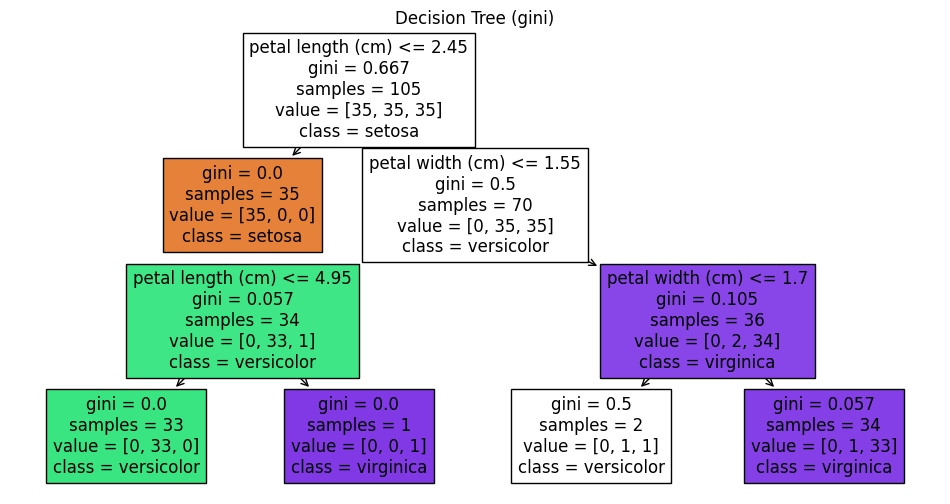


===== Decision Tree (entropy) =====
Accuracy: 0.9333333333333333
Feature Importances: [0.02909594 0.         0.64358941 0.32731465]


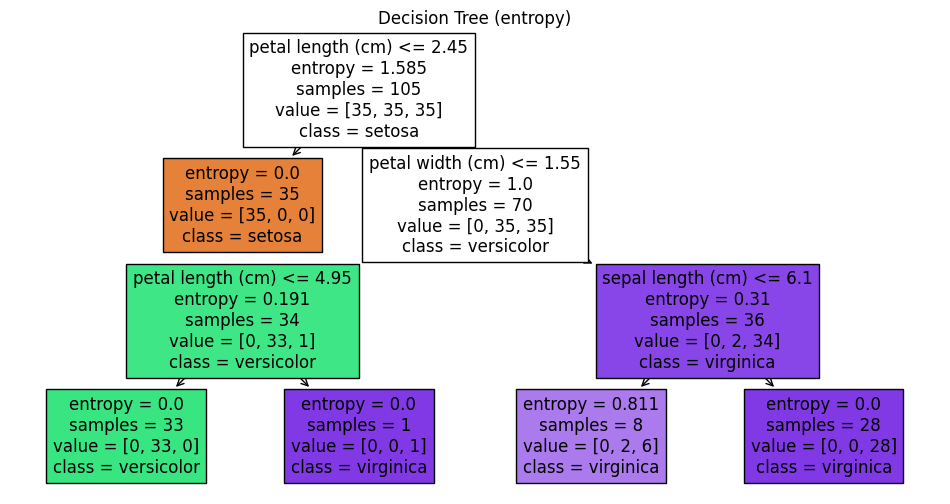

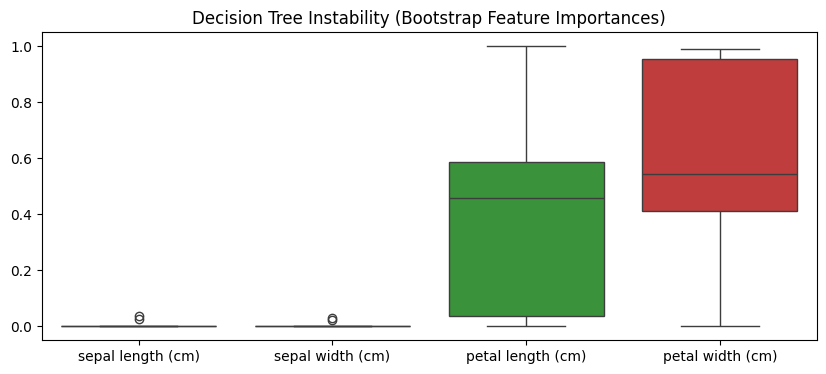

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

from sklearn.metrics import accuracy_score
import seaborn as sns
# Load dataset
data = load_iris()
X, y = data.data, data.target
feature_names = data.feature_names
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=42, stratify=y
)
# Different criteria + hyperparameters
criteria = ["gini", "entropy"]
for crit in criteria:
    print(f"\n===== Decision Tree ({crit}) =====")
    dt = DecisionTreeClassifier(
        criterion=crit,
        max_depth=3,
        min_samples_split=4,
        random_state=42
    )
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    y_proba = dt.predict_proba(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Feature Importances:", dt.feature_importances_)
    # Plot the tree
    plt.figure(figsize=(12, 6))
    plot_tree(dt, feature_names=feature_names,
              class_names=data.target_names,
              filled=True)

    plt.title(f"Decision Tree ({crit})")
    plt.show()
#
# ---------------------------------------------------------------------
# INSTABILITY DEMONSTRATION: Bootstrap different samples & plot
# results
#
# ---------------------------------------------------------------------

n_bootstraps = 30
importances = []
for i in range(n_bootstraps):
    # Bootstrap sampling
    idx = np.random.choice(len(X_train), size=len(X_train),
                           replace=True)
    X_b, y_b = X_train[idx], y_train[idx]
    # Fit a shallow tree to exaggerate instability
    dt_bs = DecisionTreeClassifier(max_depth=3)
    dt_bs.fit(X_b, y_b)
    importances.append(dt_bs.feature_importances_)
importances = np.array(importances)
# Plot variance of feature importances
plt.figure(figsize=(10, 4))
sns.boxplot(data=importances)
plt.xticks(ticks=range(len(feature_names)), labels=feature_names)
plt.title("Decision Tree Instability (Bootstrap Feature Importances)")
plt.show()

In [8]:
# ----------------------------------------------------------
# ENSEMBLE METHODS:
# Bagging, RandomForest, AdaBoost, Stacking
# ----------------------------------------------------------
from sklearn.ensemble import (
BaggingClassifier, RandomForestClassifier,
AdaBoostClassifier, StackingClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
# Load data
data = load_iris()
X, y = data.data, data.target
# Same fixed split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0, stratify=y
)
# ----------------------------------------------------------
# Base Decision Tree
# ----------------------------------------------------------
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print("\nSingle Decision Tree Accuracy:", accuracy_score(y_test,
dt_pred))

# ----------------------------------------------------------
# Bagging
# ----------------------------------------------------------
bag = BaggingClassifier(
  estimator=DecisionTreeClassifier(),
  n_estimators=50,
  random_state=0
)
bag.fit(X_train, y_train)
bag_pred = bag.predict(X_test)
print("Bagging Accuracy:", accuracy_score(y_test, bag_pred))
# ----------------------------------------------------------
# Random Forest (with OOB score)
# ----------------------------------------------------------
rf = RandomForestClassifier(
n_estimators=200,
oob_score=True,
bootstrap=True,
random_state=0
)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Random Forest OOB Score:", rf.oob_score_)
# ----------------------------------------------------------
# AdaBoost
# ----------------------------------------------------------
ada = AdaBoostClassifier(
estimator=DecisionTreeClassifier(max_depth=1),
n_estimators=100,
learning_rate=0.8,
random_state=0
)
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, ada_pred))

# ----------------------------------------------------------
# Stacking (Tree + SVM → Logistic Regression)
# ----------------------------------------------------------
estimators = [
("dt", DecisionTreeClassifier(max_depth=3)),
("svm", SVC(probability=True))
]
stack = StackingClassifier(
estimators=estimators,
final_estimator=LogisticRegression()
)
stack.fit(X_train, y_train)
stack_pred = stack.predict(X_test)
print("Stacking Accuracy:", accuracy_score(y_test, stack_pred))
# ----------------------------------------------------------
# Summary Table
# ----------------------------------------------------------
print("\n=== ACCURACY SUMMARY ===")
print(f"Decision Tree : {accuracy_score(y_test, dt_pred):.3f}")
print(f"Bagging : {accuracy_score(y_test, bag_pred):.3f}")
print(f"RandomForest : {accuracy_score(y_test, rf_pred):.3f}")
print(f"AdaBoost : {accuracy_score(y_test, ada_pred):.3f}")
print(f"Stacking : {accuracy_score(y_test, stack_pred):.3f}")


Single Decision Tree Accuracy: 0.9777777777777777
Bagging Accuracy: 0.9777777777777777
Random Forest Accuracy: 0.9777777777777777
Random Forest OOB Score: 0.9333333333333333
AdaBoost Accuracy: 0.9555555555555556
Stacking Accuracy: 1.0

=== ACCURACY SUMMARY ===
Decision Tree : 0.978
Bagging : 0.978
RandomForest : 0.978
AdaBoost : 0.956
Stacking : 1.000


Baseline k-NN Accuracy (original 64 dims): 0.9833333333333333
PCA k-NN Accuracy: 0.6111111111111112
Kernel PCA (RBF) k-NN Accuracy: 0.32222222222222224
LLE k-NN Accuracy: 0.8916666666666667


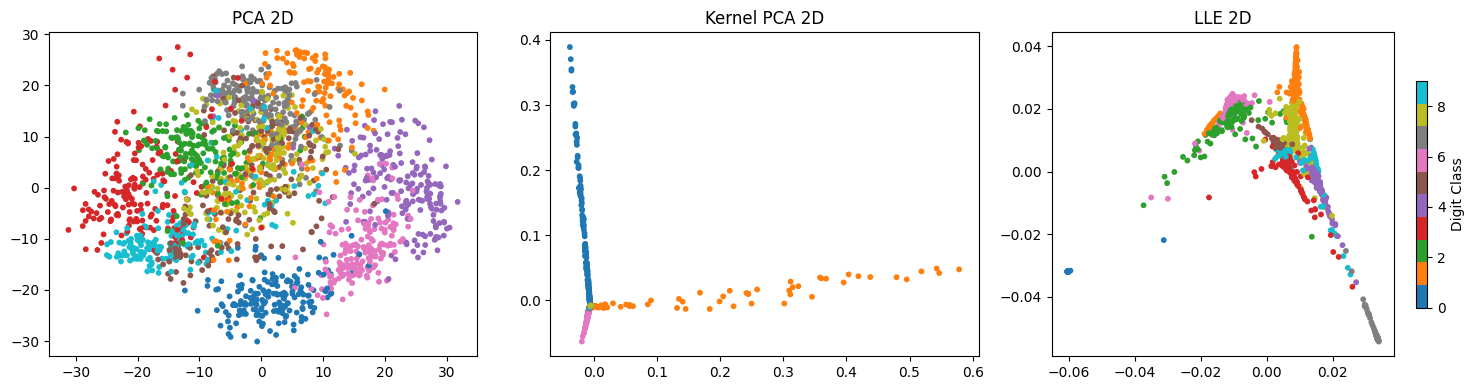

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import LocallyLinearEmbedding

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Load dataset
digits = load_digits()
X = digits.data
y = digits.target
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Baseline kNN accuracy without dimensionality reduction
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
baseline_acc = accuracy_score(y_test, knn.predict(X_test))
print("Baseline k-NN Accuracy (original 64 dims):", baseline_acc)
# ---------- PCA ----------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
# ---------- Kernel PCA ----------
kpca = KernelPCA(n_components=2, kernel="rbf", gamma=0.01)
X_kpca = kpca.fit_transform(X)
# ---------- LLE ----------
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_lle = lle.fit_transform(X)
# ---------- Evaluate kNN after DR ----------
def eval_reduced_data(X_reduced, name):
  X_train_r, X_test_r, _, _ = train_test_split(
      X_reduced, y, test_size=0.2, random_state=42)
  knn = KNeighborsClassifier(n_neighbors=3)
  knn.fit(X_train_r, y_train)
  acc = accuracy_score(y_test, knn.predict(X_test_r))
  print(f"{name} k-NN Accuracy:", acc)

eval_reduced_data(X_pca, "PCA")
eval_reduced_data(X_kpca, "Kernel PCA (RBF)")
eval_reduced_data(X_lle, "LLE")
# ---------- Plotting ----------
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
titles = ["PCA 2D", "Kernel PCA 2D", "LLE 2D"]
datasets = [X_pca, X_kpca, X_lle]
for i, (ax, data, title) in enumerate(zip(axes, datasets, titles)):
  scatter = ax.scatter(data[:, 0], data[:, 1], c=y, cmap="tab10",s=10)
  ax.set_title(title)
  # Only add colorbar for the last subplot for better visualization or iterate on its specific ax
  # Or make sure to handle it correctly for each ax
  # For a single colorbar shared across all subplots, it's more complex.
  # For individual colorbars, `ax=ax` is correct, but may clutter.
  # To fix the warning and ensure it shows with the correct plot:
  if i == 2: # Add colorbar only to the last plot to avoid clutter or specific ax
      cbar = fig.colorbar(scatter, ax=ax, shrink=0.7)
      cbar.set_label('Digit Class')

plt.tight_layout()
plt.show()